import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as SKPCA
from sklearn.manifold import TSNE

load dataset

In [2]:
data = load_iris()
X = data.data
y = data.target
X_std = StandardScaler().fit_transform(X)

PCA from scratch

In [3]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
sorted_idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_idx]
eig_vecs = eig_vecs[:, sorted_idx]
k = 2
W = eig_vecs[:, :k]
X_pca_scratch = X_std.dot(W)

PCA Using library

In [4]:
pca = SKPCA(n_components=2)
X_pca_sklearn = pca.fit_transform(X_std)

Comparing scratch vs library

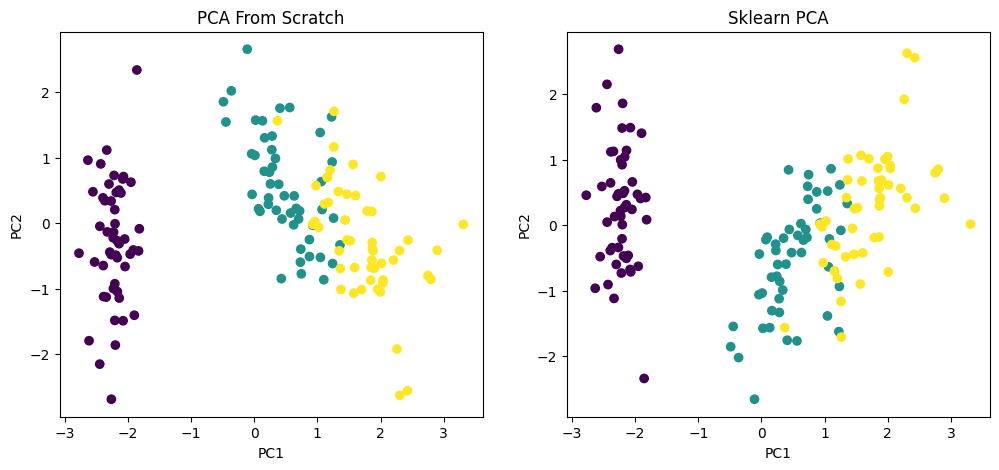

In [5]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X_pca_scratch[:,0], X_pca_scratch[:,1], c=y)
plt.title("PCA From Scratch")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.subplot(1,2,2)
plt.scatter(X_pca_sklearn[:,0], X_pca_sklearn[:,1], c=y)
plt.title("Sklearn PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()

t-SNE with Tuned Perplexity

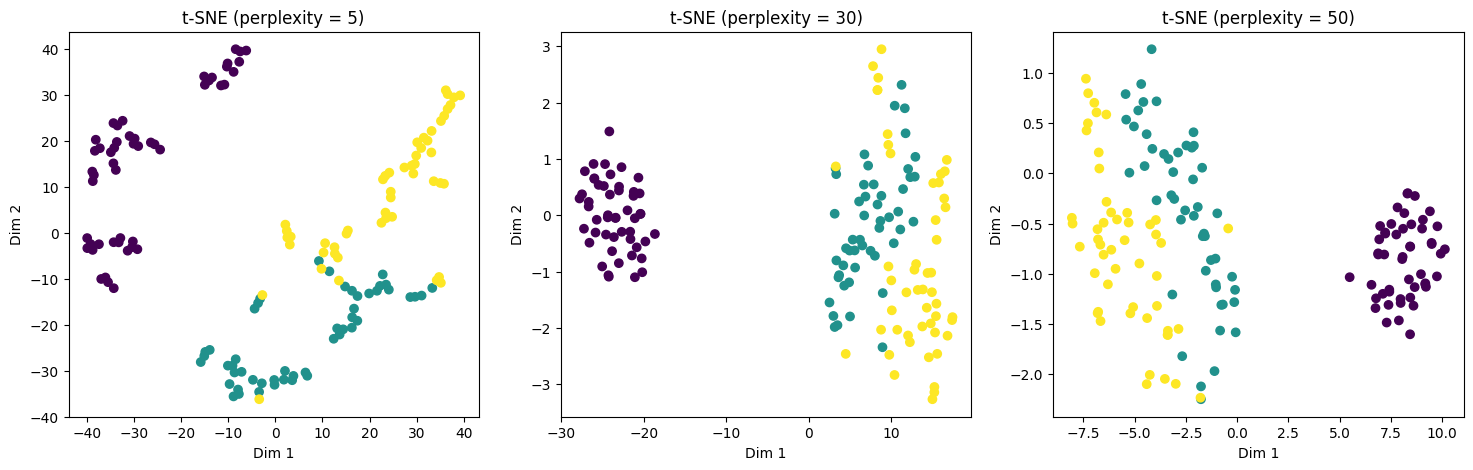

In [6]:
perplexities = [5, 30, 50]
plt.figure(figsize=(18,5))
for i, perp in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42)
    X_tsne = tsne.fit_transform(X_std)
    plt.subplot(1, 3, i+1)
    plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y)
    plt.title(f"t-SNE (perplexity = {perp})")
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")
plt.show()